In [1]:
options(stringsAsFactors = FALSE, warn = -1,
        repr.plot.res = 200,
        repr.plot.width=8, repr.plot.height=4.5)

## install devtools if not installed
if(!("devtools" %in% rownames(installed.packages()))){
  install.packages("devtools",  repos = c(CRAN = "http://cran.rstudio.com"))
  }

## install bmetenrichr if not installed
if(!("bmetenrichr" %in% rownames(installed.packages()))){
   devtools::install_github(repo = "martijnmolenaar/bmetenrichr")
}


In [2]:
library(bmetenrichr)

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## simple anlayses using LION

In [3]:
## load example data 
data("Rappez_et_al")

In [4]:
## example sc_matrix
## is SpaceM dataset from Rappez et al. (2022) Nat. Methods.

Rappez_et_al$sc_matrix[1:10,1:10]

,8,15,18,25,27,29,35,38,41,47
C10H10N4O.K,0.01145815,0.0000000,0.00000000,0.00000000,0.00000000,0.008558847,0.000000000,0.00000000,0.000000000,0.000000000
C10H10O6.K,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.006726224
C10H11N4O7P.Na,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.005782876,0.02968958,0.000000000,0.000000000
C10H11N5O3.H,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
C10H12ClN5O3.K,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
C10H12ClN5O3.Na,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
C10H12ClNO4.H,0.01707534,0.0620677,0.05203464,0.01376432,0.02417577,0.028755533,0.030977567,0.03611660,0.009692678,0.031959898
C10H12ClNO4.K,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000
C10H12ClNO4.Na,0.17496077,0.1702377,0.17311070,0.16992632,0.01635700,0.174631645,0.147417684,0.12427280,0.160955912,0.120047020
C10H12FN5O4.H,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000,0.000000000,0.000000000,0.00000000,0.000000000,0.000000000


In [5]:
## example annotations
rownames(Rappez_et_al$sc_matrix)[1:10]

[1] "C10H10N4O.K"     "C10H10O6.K"      "C10H11N4O7P.Na"  "C10H11N5O3.H"   
 [5] "C10H12ClN5O3.K"  "C10H12ClN5O3.Na" "C10H12ClNO4.H"   "C10H12ClNO4.K"  
 [9] "C10H12ClNO4.Na"  "C10H12FN5O4.H"

In [6]:
## conditions in example
Rappez_et_al$conditions[1:10]

[1] "F" "F" "F" "F" "F" "F" "F" "F" "F" "F"

In [7]:
## should the annotations be included in the analysis? 
Rappez_et_al$cellular[1:10]

C10H10N4O.K      C10H10O6.K  C10H11N4O7P.Na    C10H11N5O3.H  C10H12ClN5O3.K 
          FALSE           FALSE           FALSE            TRUE           FALSE 
C10H12ClN5O3.Na   C10H12ClNO4.H   C10H12ClNO4.K  C10H12ClNO4.Na   C10H12FN5O4.H 
          FALSE           FALSE           FALSE           FALSE           FALSE

In [8]:
## create object

myTestRun <-
  initEnrichment(scmatrix = Rappez_et_al$sc_matrix,
                 annotations = rownames(Rappez_et_al$sc_matrix),
                 conditions = Rappez_et_al$conditions,
                 include = Rappez_et_al$cellular,
                 condition.x = "U",
                 condition.y = "F"                    )


Parsing isomers...
single-cell metabolomics matrix of 3385 metabolites and 8807 cells
active pathway: LION 

conditions: F, FI, FIT, U 

condition.x: U 
condition.y: F 


In [9]:
## rank metabolites, in this case by t.test statistic

myTestRun <- rankScore(myTestRun, ranking.by = 't.test')

number of ties: 19 (1.73%)



In [10]:
## perform enrichment analysis with n = 100 bootstraps

myTestRun <- calcEnrichment(myTestRun, n = 100)


Bootstrapping...

Match to pathway...


35.43% of annotations were matched to pathway




Perform enrichment analysis...


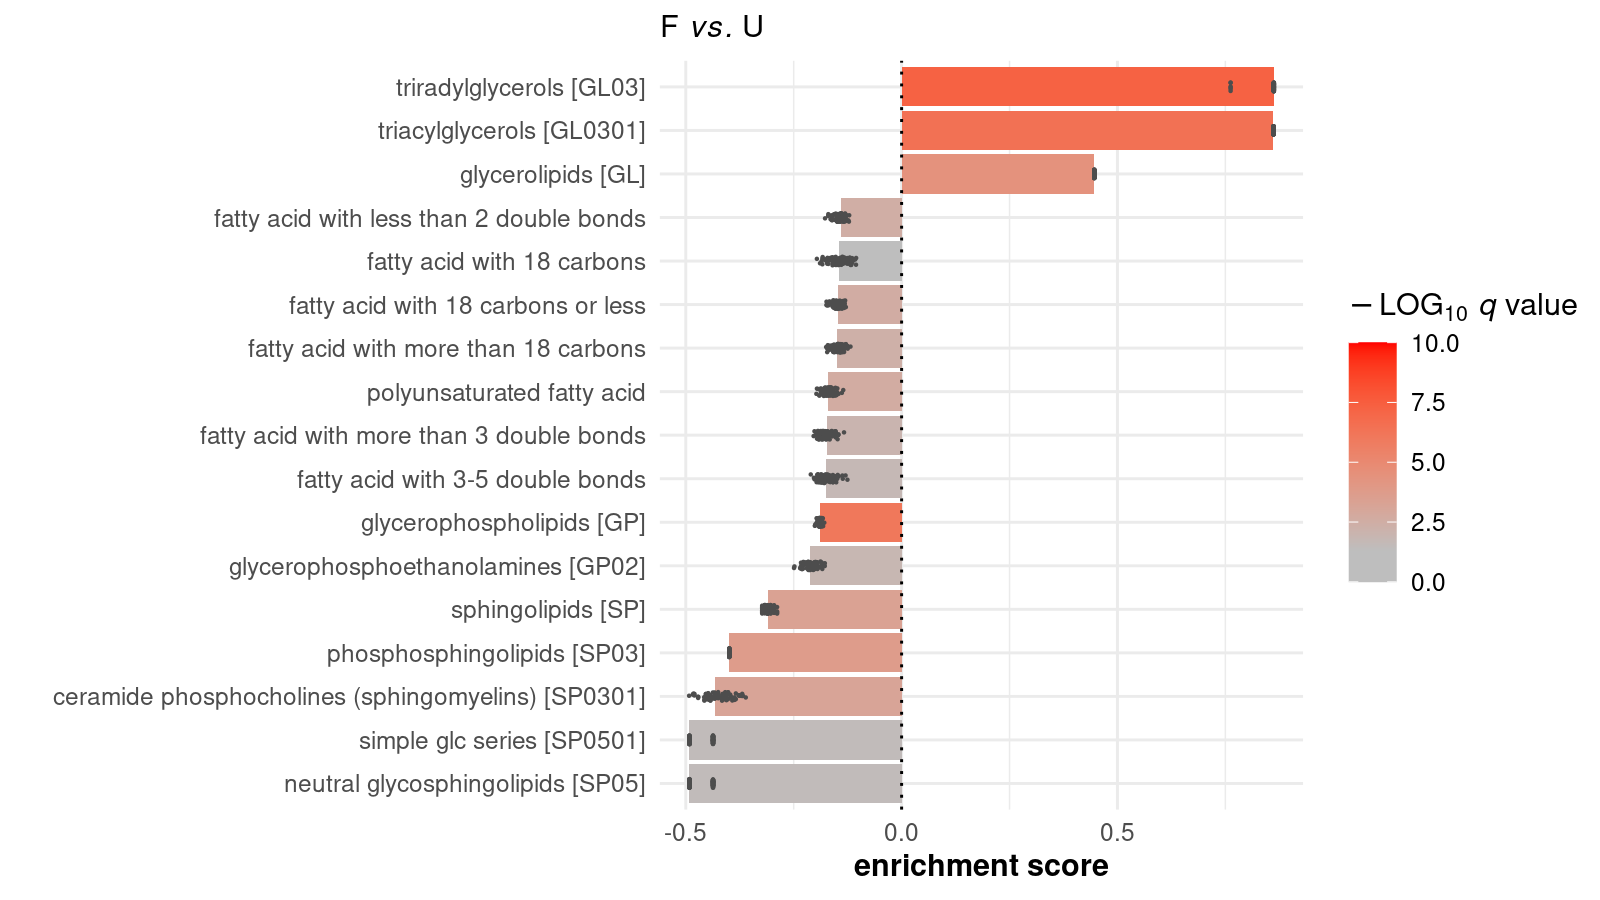

In [11]:
## plot enrichment analysis, with enrichment score (ES) on x-axis

plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05, by.statistic = "ES")

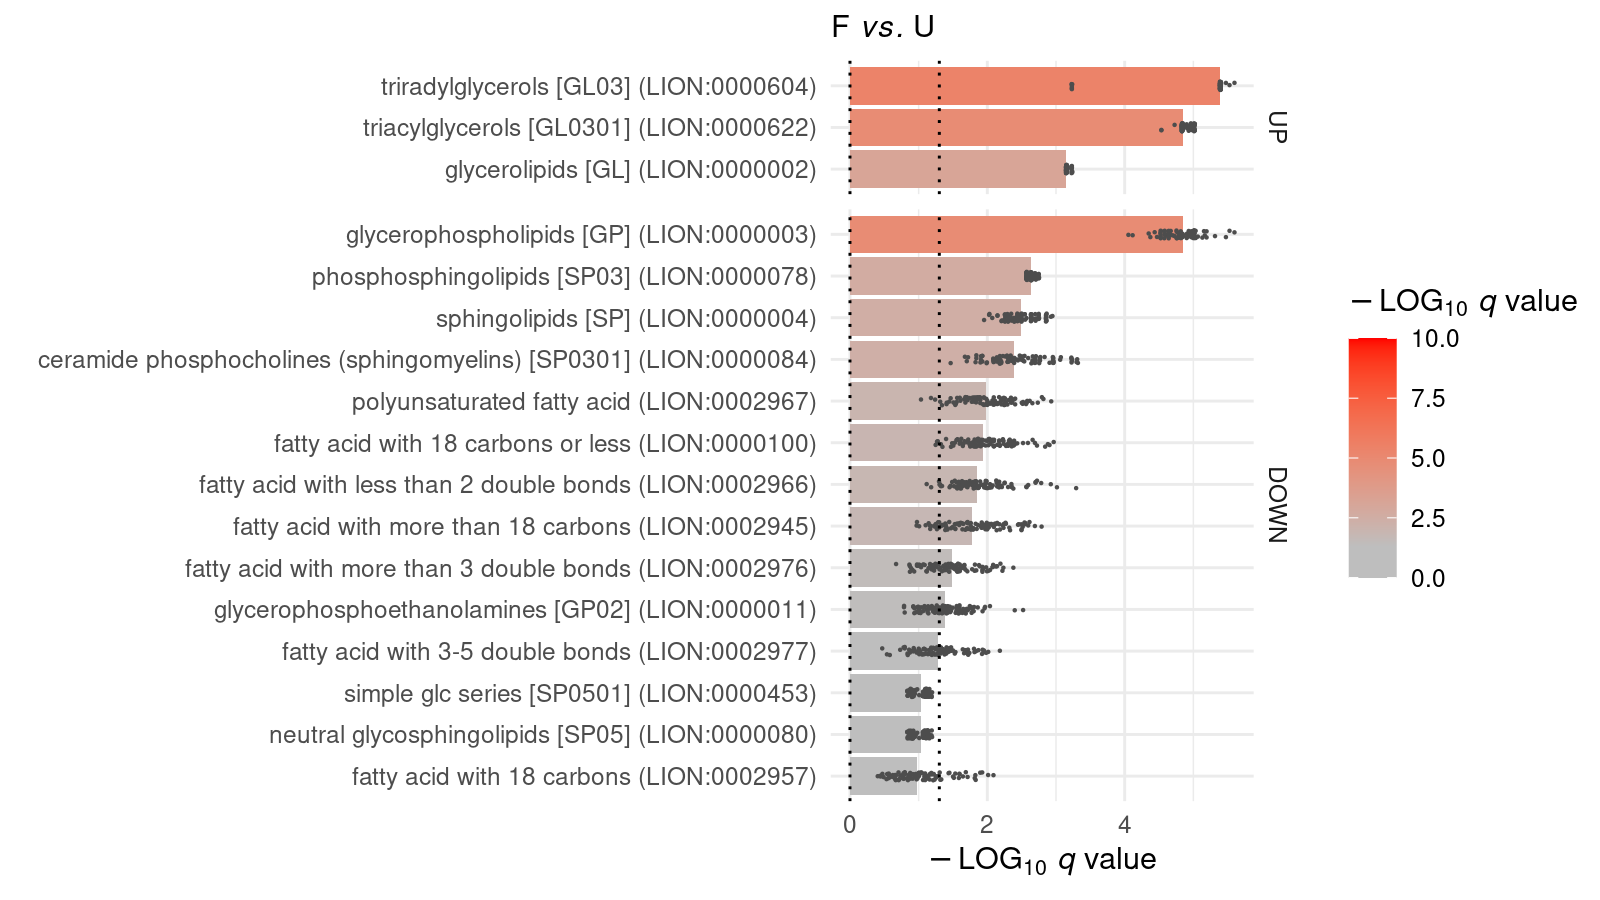

In [12]:
## plot enrichment analysis, now with q.values on x-axis, and with LION IDs

plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05, plotIDs = T, by.statistic = "q.value")

In [13]:
## export enrichment table

enrichmentTable(myTestRun)

LION_ID,LION_name,n,ES_median,ES_sd,p.value_median,p.value_sd,q.value_median,q.value_sd,fraction.bootstrap.presence
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LION:0000604,triradylglycerols [GL03],9.0,0.8622590,0.0238985430,4.596620e-08,4.771350e-06,4.045026e-06,1.393278e-04,1
LION:0000003,glycerophospholipids [GP],290.0,-0.1897832,0.0039772731,4.214191e-07,4.148716e-07,1.418004e-05,1.261171e-05,1
LION:0000622,triacylglycerols [GL0301],8.0,0.8614679,0.0000000000,3.317287e-07,0.000000e+00,1.418004e-05,3.274892e-06,1
LION:0000002,glycerolipids [GL],28.0,0.4463952,0.0000000000,3.787071e-05,0.000000e+00,7.046016e-04,3.499027e-05,1
LION:0000078,phosphosphingolipids [SP03],30.0,-0.3992509,0.0000000000,1.823436e-04,0.000000e+00,2.292319e-03,2.642688e-04,1
LION:0000004,sphingolipids [SP],48.0,-0.3102381,0.0087270845,2.908494e-04,1.959355e-04,3.199343e-03,1.861470e-03,1
LION:0000084,ceramide phosphocholines (sphingomyelins) [SP0301],25.0,-0.4314257,0.0288928612,4.158785e-04,6.740843e-04,4.046858e-03,5.331151e-03,1
LION:0002967,polyunsaturated fatty acid,151.0,-0.1694452,0.0116232912,1.208016e-03,2.641412e-03,1.030510e-02,1.451184e-02,1
LION:0000100,fatty acid with 18 carbons or less,206.0,-0.1482324,0.0098409354,1.306711e-03,1.822810e-03,1.159916e-02,1.182690e-02,1


In [14]:
## now, let's test FIT vs F

myTestRun <-  setConditions(object = myTestRun, condition.x = 'F', condition.y = 'FIT')
myTestRun

single-cell metabolomics matrix of 3385 metabolites and 8807 cells
active pathway: LION 

conditions: F, FI, FIT, U 

condition.x: F 
condition.y: FIT 

In [15]:
## rank metabolites, in this case by t.test statistic

myTestRun <- rankScore(myTestRun, ranking.by = 't.test')

number of ties: 24 (2.19%)



In [16]:

myTestRun <- calcEnrichment(myTestRun, n = 100)


Bootstrapping...

Match to pathway...


15.65% of annotations were matched to pathway




Perform enrichment analysis...


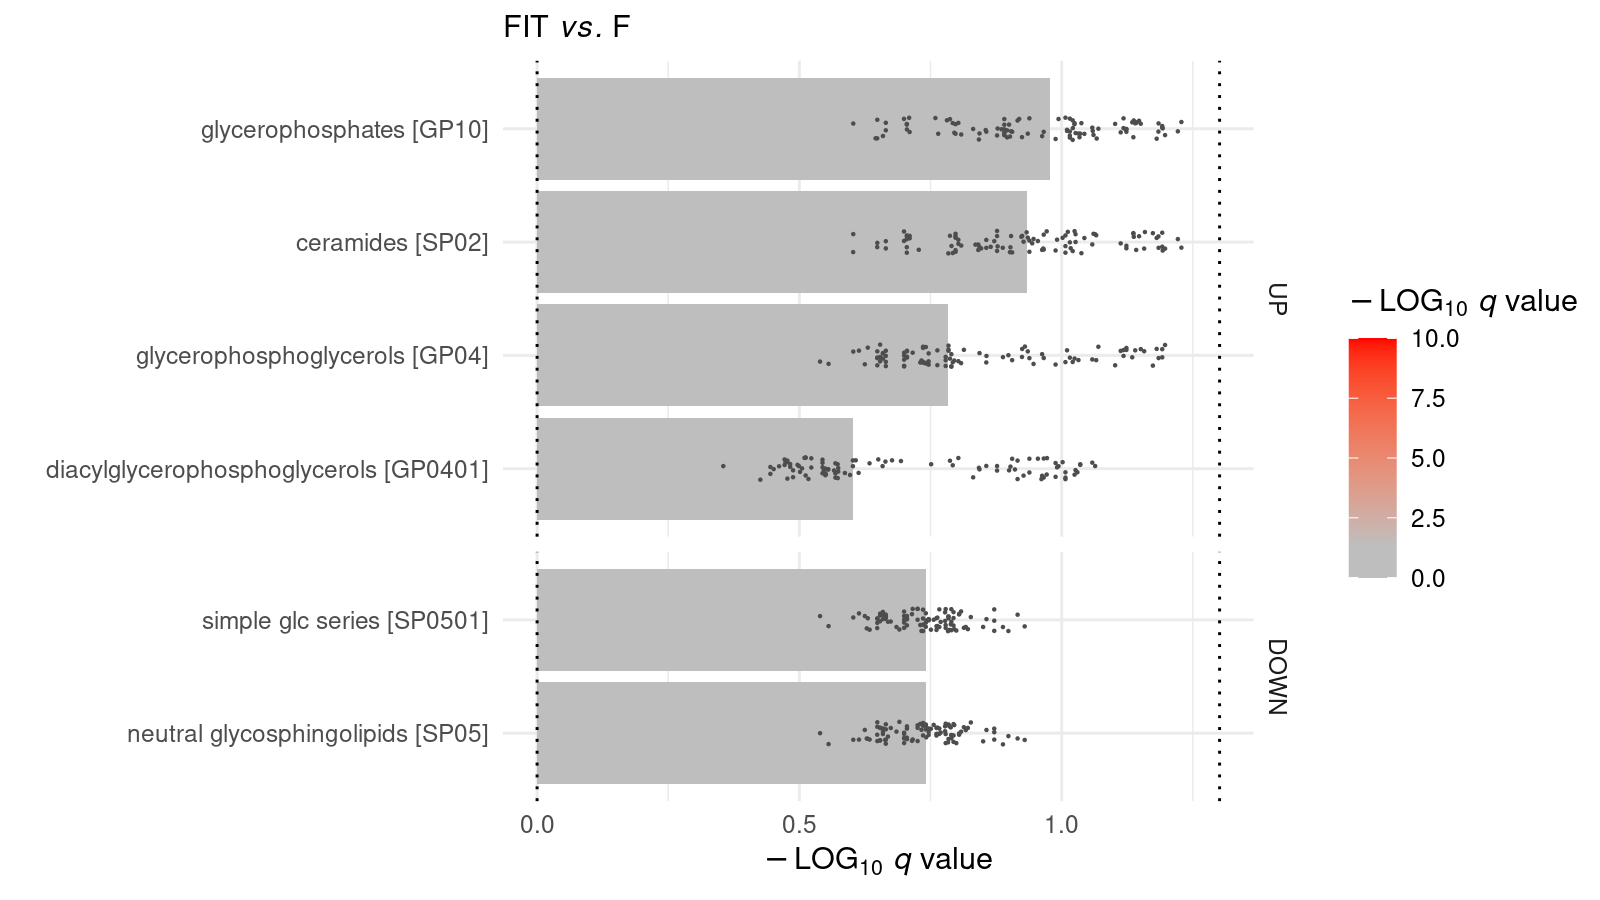

In [17]:
plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05)

## run LION enrichment with including isobars

In [18]:
## it's possible to expand the analysis by including isobars (by default, only isomers are included)
## isobars are predicted under the hood, no specific data is required
## except:
##  - for polarization_mode ('positive' or 'negative')
##  - mass_range_ppm

## create object

myTestRun <-
  initEnrichment(scmatrix = Rappez_et_al$sc_matrix, 
                 isobars = TRUE,                      ## to include isobars (default is FALSE)
                 mass_range_ppm = 3,                  ## mass range to define isobars
                 polarization_mode = "positive",      ## mode, is important to include the right adducts
                 annotations = rownames(Rappez_et_al$sc_matrix), 
                 conditions = Rappez_et_al$conditions,
                 include = Rappez_et_al$cellular,
                 condition.x = "U",
                 condition.y = "F"                    )

polarization_mode is: positive




Parsing isomers...
Parsing potential isobars...

single-cell metabolomics matrix of 3385 metabolites and 8807 cells
active pathway: LION 

conditions: F, FI, FIT, U 

condition.x: U 
condition.y: F 


In [19]:
## rank metabolites, in this case by t.test statistic

myTestRun <- rankScore(myTestRun, ranking.by = 't.test')

number of ties: 19 (1.73%)



In [20]:
## perform enrichment analysis with n = 100 bootstraps

myTestRun <- calcEnrichment(myTestRun, n = 100)


Bootstrapping...

Match to pathway...


35.34% of annotations were matched to pathway




Perform enrichment analysis...


In [21]:
## example of the annotations, that now also include isobars

myTestRun$annotations[sample(which(sapply(myTestRun$isobars_list, length) > 1), size = 1)]

[[1]]
                                        isomer1 
"PA(O-20:1(11Z)/28:6(10Z,13Z,16Z,19Z,22Z,25Z))" 
                                        isomer2 
"PA(O-18:1(11Z)/30:6(12Z,15Z,18Z,21Z,24Z,27Z))" 
                                        isomer3 
 "PA(O-22:1(13Z)/26:6(8Z,11Z,14Z,17Z,20Z,23Z))" 
                                        isomer4 
"PA(O-18:1(13Z)/30:6(12Z,15Z,18Z,21Z,24Z,27Z))" 
                                        isomer5 
 "PA(O-18:2(9Z,12Z)/30:5(12Z,15Z,18Z,21Z,24Z))" 
                                        isomer6 
 "PA(O-18:2(9Z,12Z)/30:5(15Z,18Z,21Z,24Z,27Z))" 
                                        isomer7 
 "PA(O-18:1(9Z)/30:6(12Z,15Z,18Z,21Z,24Z,27Z))" 
                                        isomer8 
    "PA(P-20:1(11Z)/28:5(10Z,13Z,16Z,19Z,22Z))" 
                                        isomer9 
    "PA(P-20:1(11Z)/28:5(13Z,16Z,19Z,22Z,25Z))" 
                                       isomer10 
    "PA(P-18:1(11Z)/30:5(12Z,15Z,18Z,21Z,24Z))" 
                                       isomer11 
    "PA(P-18:1(11Z)/30:5(15Z,18Z,21Z,24Z,27Z))" 
                                       isomer12 
    "PA(P-22:1(13Z)/26:5(11Z,14Z,17Z,20Z,23Z))" 
                                       isomer13 
     "PA(P-22:1(13Z)/26:5(8Z,11Z,14Z,17Z,20Z))" 
                                       isomer14 
    "PA(P-18:1(13Z)/30:5(12Z,15Z,18Z,21Z,24Z))" 
                                       isomer15 
    "PA(P-18:1(13Z)/30:5(15Z,18Z,21Z,24Z,27Z))" 
                                       isomer16 
     "PA(P-18:2(9Z,12Z)/30:4(15Z,18Z,21Z,24Z))" 
                                       isomer17 
     "PA(P-18:1(9Z)/30:5(12Z,15Z,18Z,21Z,24Z))" 
                                       isomer18 
     "PA(P-18:1(9Z)/30:5(15Z,18Z,21Z,24Z,27Z))" 
                                       isomer19 
      "PA(P-22:0/26:6(8Z,11Z,14Z,17Z,20Z,23Z))" 
                                       isomer20 
     "PA(P-20:0/28:6(10Z,13Z,16Z,19Z,22Z,25Z))" 
                                       isomer21 
       "PA(P-26:0/22:6(4Z,7Z,10Z,13Z,16Z,19Z))" 
                                       isomer22 
     "PA(P-16:0/32:6(14Z,17Z,20Z,23Z,26Z,29Z))" 
                                       isomer23 
     "PA(P-18:0/30:6(12Z,15Z,18Z,21Z,24Z,27Z))" 
                                       isomer24 
       "PA(P-24:0/24:6(6Z,9Z,12Z,15Z,18Z,21Z))" 
                                       isomer25 
     "PA(P-14:0/34:6(16Z,19Z,22Z,25Z,28Z,31Z))" 
                                       isomer26 
                                   "PA(O-48:6)" 
                                        isobar1 
                           "PA(24:1(15Z)/21:0)" 
                                        isobar2 
                           "PA(26:1(17Z)/19:0)" 
                                        isobar3 
                           "PA(21:0/24:1(15Z))" 
                                        isobar4 
                           "PA(19:0/26:1(17Z))" 
                                        isobar5 
                                     "PA(45:0)" 
                                        isobar6 
                                   "PA(O-50:9)"

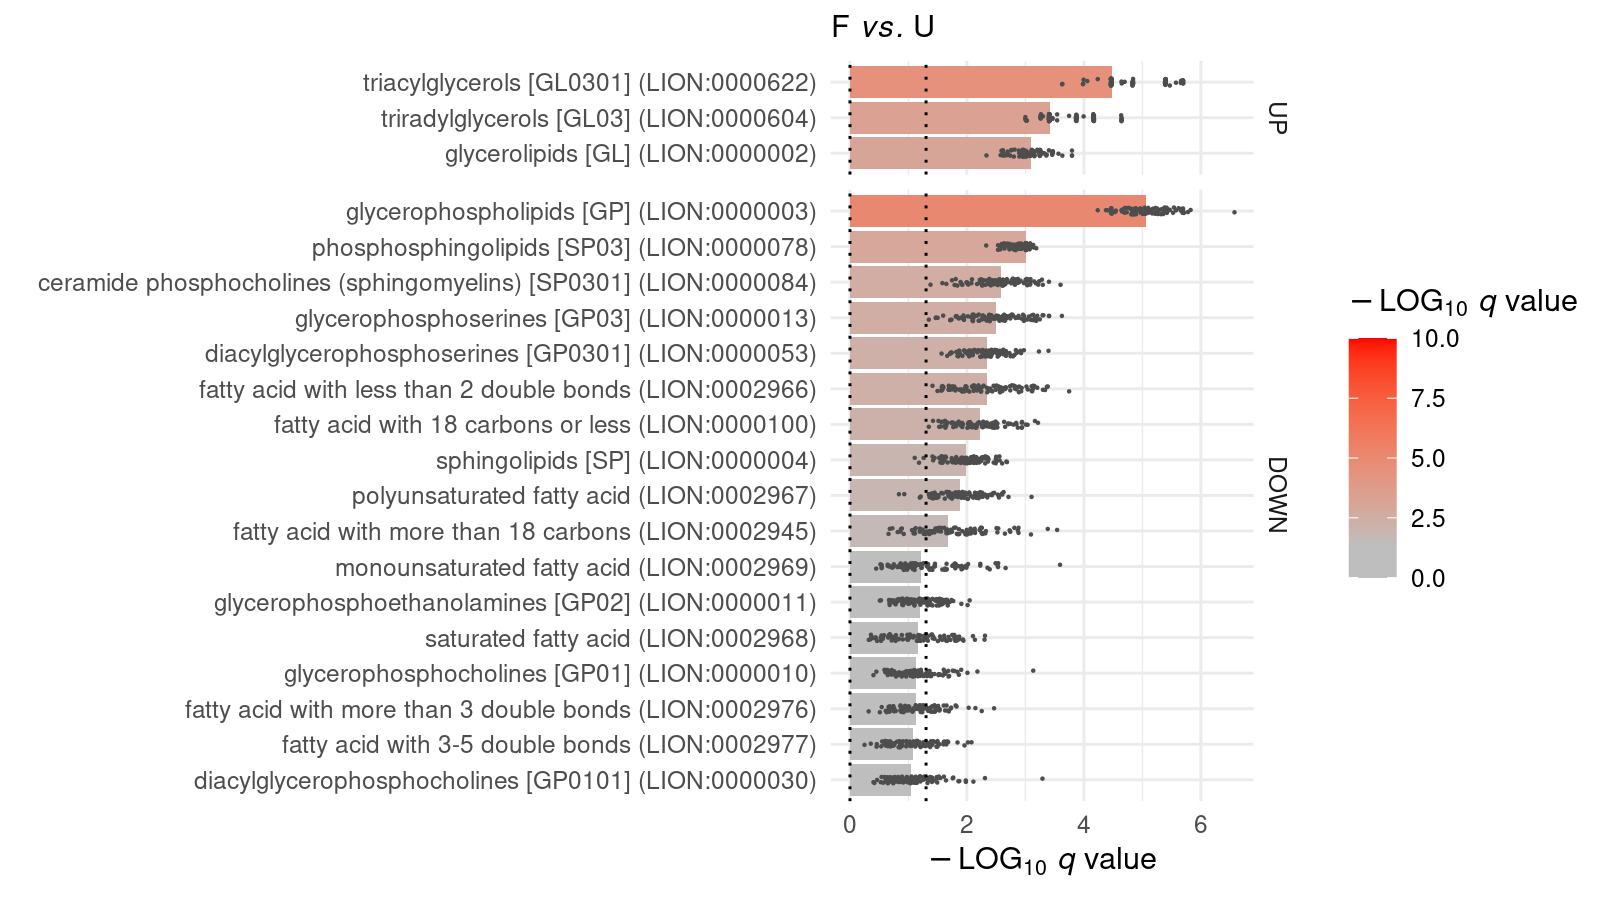

In [22]:
## plot enrichment analysis, with q.values on x-axis, and with LION IDs

plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05, plotIDs = T, by.statistic = "q.value")

## custom analyses

In [23]:
## it's possible to use a custom metabolite set enrichment pathway
## this should be formatted as a names list, with each element a vector of the metabolites within the set

myPathway <- myTestRun$pathway_list[sample(100, size = 20)]

str(myPathway)

List of 20
 $ LION:0002945: chr [1:5354] "CDP-DG(20:4(5Z,8Z,11Z,14Z)/16:1(9Z))" "DG(10:0/0:0/22:0)" "DG(10:0/22:0/0:0)" "DG(10:0/i-22:0/0:0)" ...
 $ LION:0002956: chr [1:466] "DG(15:0/0:0/17:0)" "DG(15:0/0:0/i-17:0)" "DG(15:0/i-17:0/0:0)" "DG(17:0/0:0/22:0)" ...
 $ LION:0000049: chr [1:9] "PI(P-16:0/18:3(6Z,9Z,12Z))" "PI(P-16:0/18:3(9Z,12Z,15Z))" "PI(P-14:0/20:3(11Z,14Z,17Z))" "PI(P-14:0/20:3(8Z,11Z,14Z))" ...
 $ LION:0000014: chr [1:212] "PG(18:0/18:1(11Z))" "PG(18:0/18:1(9Z))" "PG(18:0/18:2(9Z,12Z))" "PG(18:1(11Z)/18:0)" ...
 $ LION:0002976: chr [1:3437] "CDP-DG(18:2(9Z,12Z)/18:3(6Z,9Z,12Z))" "CDP-DG(18:3(6Z,9Z,12Z)/18:2(9Z,12Z))" "CDP-DG(18:3(9Z,12Z,15Z)/18:2(9Z,12Z))" "CDP-DG(20:4(5Z,8Z,11Z,14Z)/16:1(9Z))" ...
 $ LION:0000602: chr [1:22] "MG(0:0/16:0/0:0)" "MG(0:0/19:0/0:0)" "MG(0:0/20:3(11Z,14Z,17Z)/0:0)" "MG(0:0/20:3(5Z,8Z,11Z)/0:0)" ...
 $ LION:0000619: chr [1:22] "MG(0:0/16:0/0:0)" "MG(0:0/19:0/0:0)" "MG(0:0/20:3(11Z,14Z,17Z)/0:0)" "MG(0:0/20:3(5Z,8Z,11Z)/0:0)" ...
 $ LION:0000

In [24]:
## also, custom annotations can be provided as list
my_annotations <- myTestRun$annotations
str(my_annotations[825:829])

List of 5
 $ : Named chr [1:3] "PI(4:0/4:0)" "PI(2:0/6:0)" "PI(6:0/2:0)"
  ..- attr(*, "names")= chr [1:3] "isomer1" "isomer2" "isomer3"
 $ : chr(0) 
 $ : chr(0) 
 $ : Named chr [1:10] "PC(6:0/3:0)" "PC(3:0/6:0)" "PE(6:0/6:0)" "PE(2:0/10:0)" ...
  ..- attr(*, "names")= chr [1:10] "isomer1" "isomer2" "isomer3" "isomer4" ...
 $ : Named chr [1:10] "PC(6:0/3:0)" "PC(3:0/6:0)" "PE(6:0/6:0)" "PE(2:0/10:0)" ...
  ..- attr(*, "names")= chr [1:10] "isomer1" "isomer2" "isomer3" "isomer4" ...


In [25]:
## create object

myTestRun <-
  initEnrichment(scmatrix = Rappez_et_al$sc_matrix, 
                 pathway = myPathway, 
                 termsOfInterest = "all",   ## to include 'all' terms
                 annotations = my_annotations,
                 conditions = Rappez_et_al$conditions,
                 include = Rappez_et_al$cellular, 
                 condition.x = "U",
                 condition.y = "F"                    )

single-cell metabolomics matrix of 3385 metabolites and 8807 cells
active pathway: custom 

conditions: F, FI, FIT, U 

condition.x: U 
condition.y: F 


In [26]:
## rank metabolites, in this case by t.test statistic

myTestRun <- rankScore(myTestRun, ranking.by = 't.test')

number of ties: 19 (1.73%)



In [27]:

myTestRun <- calcEnrichment(myTestRun, n = 20)


Bootstrapping...

Match to pathway...


0.0% of annotations were matched to pathway




Perform enrichment analysis...


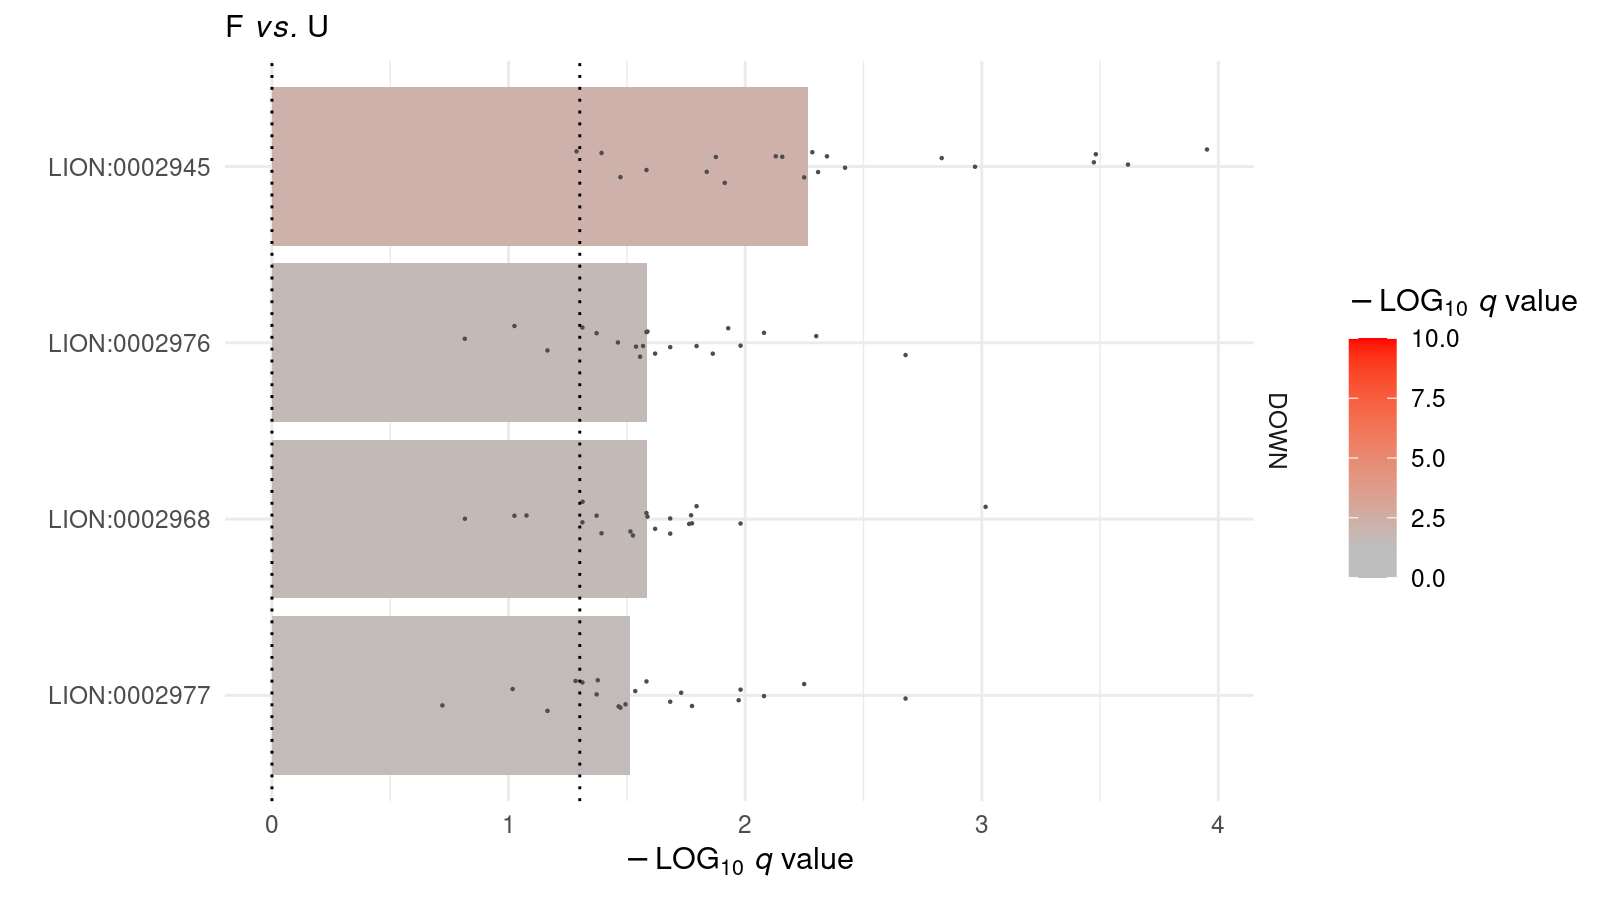

In [28]:
plotEnrichment(myTestRun, min.annotations = 5, q.value.cutoff = .05)

In [29]:
## export enrichment table

enrichmentTable(myTestRun)

LION_ID,LION_name,n,ES_median,ES_sd,p.value_median,p.value_sd,q.value_median,q.value_sd,fraction.bootstrap.presence
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LION:0002945,LION:0002945,183.0,-0.1659781,0.01840857,0.0003912003,0.001364845,0.005416861,0.01476875,1
LION:0002968,LION:0002968,129.0,-0.1584084,0.01477805,0.0055266488,0.008127772,0.026000088,0.03547057,1
LION:0002976,LION:0002976,106.5,-0.1774636,0.01439847,0.0049472636,0.006868571,0.026000088,0.03563863,1
LION:0002977,LION:0002977,96.5,-0.1804578,0.01539954,0.0064778685,0.011053141,0.030590191,0.04229601,1
LION:0012441,LION:0012441,4.0,0.5909506,0.00000000,0.0760021764,0.000000000,0.235606747,0.02714020,1
LION:0000602,LION:0000602,3.0,0.5863014,0.07471088,0.1660782921,0.061532573,0.332156584,0.07166945,1
LION:0000619,LION:0000619,3.0,0.5863014,0.07471088,0.1660782921,0.061532573,0.332156584,0.07166945,1
LION:0002972,LION:0002972,28.5,-0.1808508,0.08712844,0.3074894029,0.141360462,0.433323233,0.14726261,1
LION:0000047,LION:0000047,18.0,0.2400283,0.03010956,0.2898550627,0.160431716,0.443582323,0.15085833,1
